In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
resp = requests.get('https://www.worldometers.info/coronavirus/country/us/')
dfs = pd.read_html(resp.text)

In [3]:
len(dfs)

9

In [4]:
us_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')

In [5]:
us_df['daily_cases'] = us_df['cases']-us_df['cases'].shift()
us_df['daily_deaths'] = us_df['deaths']-us_df['deaths'].shift()

In [6]:
us_df.tail()

,date,cases,deaths,daily_cases,daily_deaths
143,2020-06-12,2059588,114752,25470.0,778.0
144,2020-06-13,2084923,115445,25335.0,693.0
145,2020-06-14,2103990,115762,19067.0,317.0
146,2020-06-15,2124082,116210,20092.0,448.0
147,2020-06-16,2148914,116979,24832.0,769.0


In [7]:
# states_df = tates_df.merge(\
#                 (pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0)-\
#                  pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0).shift()).stack().reset_index(),\
#                 how = 'left',on=['date','state']).rename(columns={0:'daily_new_cases'})

In [8]:
states_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [9]:
states_df = states_df.merge(\
                (pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0)-\
                 pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0).shift()).stack().reset_index(),\
                how = 'left',on=['date','state']).rename(columns={0:'daily_new_cases'})

In [10]:
states_df = states_df.merge(\
                (pd.pivot_table(states_df,values='deaths',index = 'date', columns='state').fillna(0)-\
                 pd.pivot_table(states_df,values='deaths',index = 'date', columns='state').fillna(0).shift()).stack().reset_index(),\
                how = 'left',on=['date','state']).rename(columns={0:'daily_new_deaths'})

In [11]:
states_df = states_df.merge(\
                (pd.pivot_table(states_df,values='deaths',index = 'date', columns='state').fillna(0)-\
                 pd.pivot_table(states_df,values='deaths',index = 'date', columns='state').fillna(0).shift(7)).stack().reset_index(),\
                how = 'left',on=['date','state']).rename(columns={0:'deaths_last_7'})

In [12]:
states_df = states_df.merge(\
                (pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0)-\
                 pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0).shift(7)).stack().reset_index(),\
                how = 'left',on=['date','state']).rename(columns={0:'cases_last_7'})

In [13]:
states_df = states_df.merge(\
                (pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0)-\
                 pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0).shift(14)).stack().reset_index(),\
                how = 'left',on=['date','state']).rename(columns={0:'cases_last_14'})

In [14]:
states_df = states_df.merge(\
                (pd.pivot_table(states_df,values='deaths',index = 'date', columns='state').fillna(0)-\
                 pd.pivot_table(states_df,values='deaths',index = 'date', columns='state').fillna(0).shift(14)).stack().reset_index(),\
                how = 'left',on=['date','state']).rename(columns={0:'deaths_last_14'})

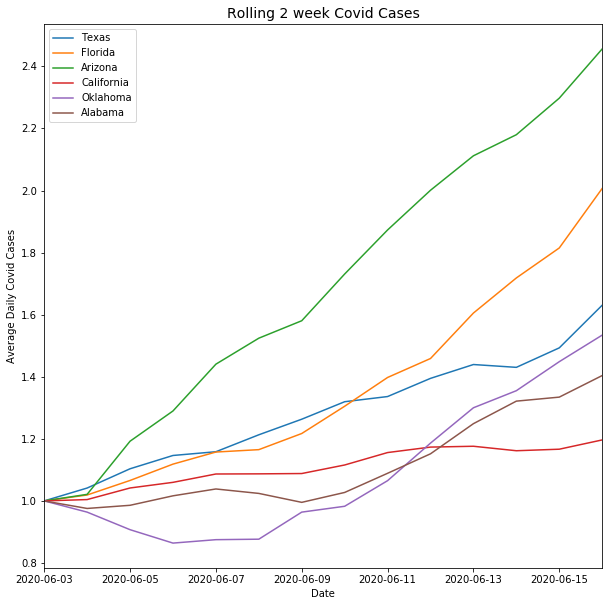

In [15]:
def plot_covid_lag(state,days=30, add_deaths = False,scaled=True):

    fig,ax = plt.subplots(figsize=(10,10))
    if type(state)==str:
        (states_df.loc[states_df['state']==state].set_index('date')['cases_last_14']/14).iloc[-days:].plot(ax=ax,label="Rolling 2 week Average")
    else:
        for stat in state:
            if scaled:
                val=states_df.loc[states_df['state']==stat].set_index('date')['cases_last_14'].iloc[-days]
            else:
                val=14
            (states_df.loc[states_df['state']==stat].set_index('date')['cases_last_14']/val).iloc[-days:].plot(ax=ax,label=stat)
        ax.set_title("Rolling 2 week Covid Cases",fontsize=14)
        ax.set_ylabel("Average Daily Covid Cases",fontsize=10)
        ax.set_xlabel("Date",fontsize=10)
        ax.legend()
        return
    if add_deaths:
        (states_df.loc[states_df['state']==state].set_index('date')['deaths_last_14']).iloc[-days:].plot(ax=ax, label = "Rolling 2 week total deaths")
    ax.set_title("Covid in April: {}".format(state))
    ax.legend()
plot_covid_lag(['Texas','Florida','Arizona','California','Oklahoma','Alabama'],days=14)

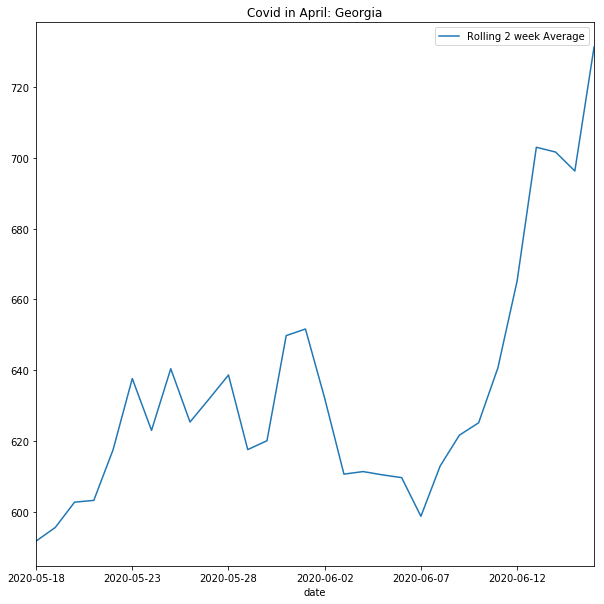

In [16]:
plot_covid_lag('Georgia')

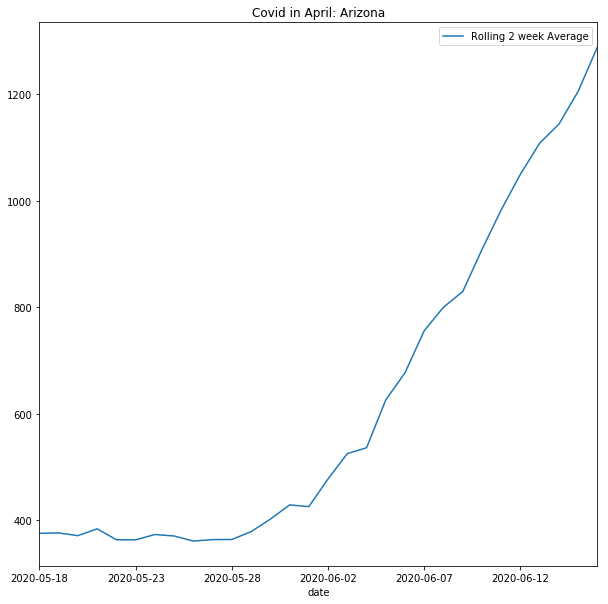

In [17]:

plot_covid_lag('Arizona')

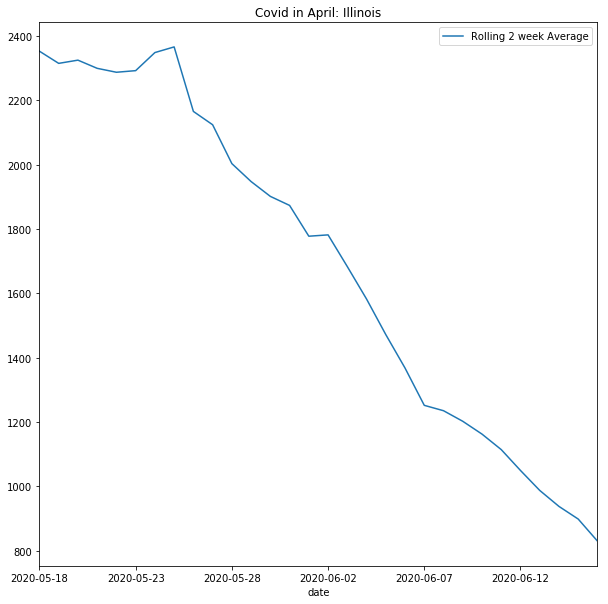

In [18]:



plot_covid_lag('Illinois')

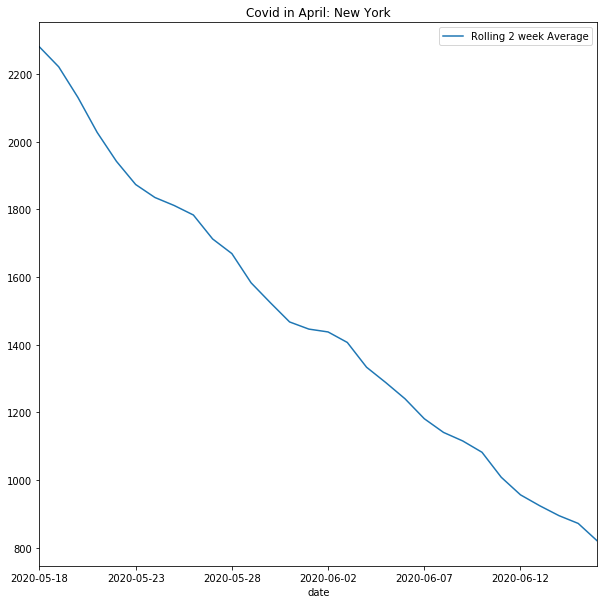

In [19]:
plot_covid_lag('New York')

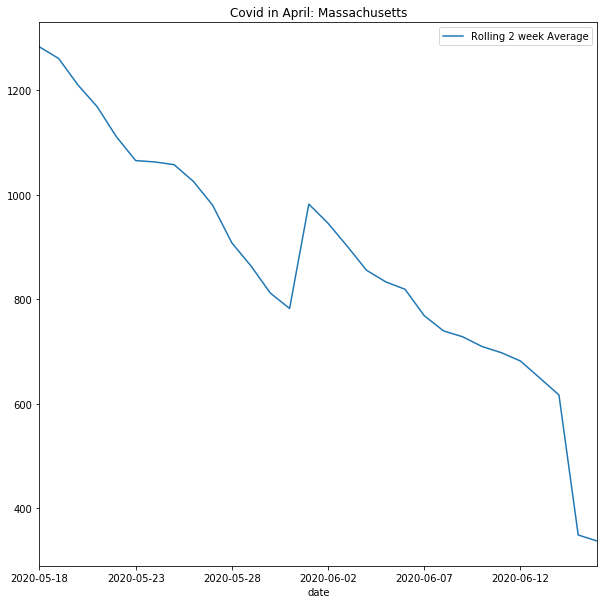

In [20]:
plot_covid_lag('Massachusetts')

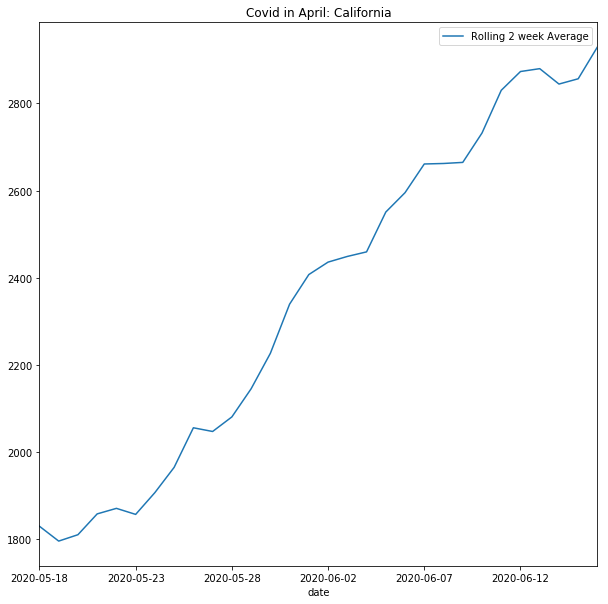

In [21]:
plot_covid_lag('California')

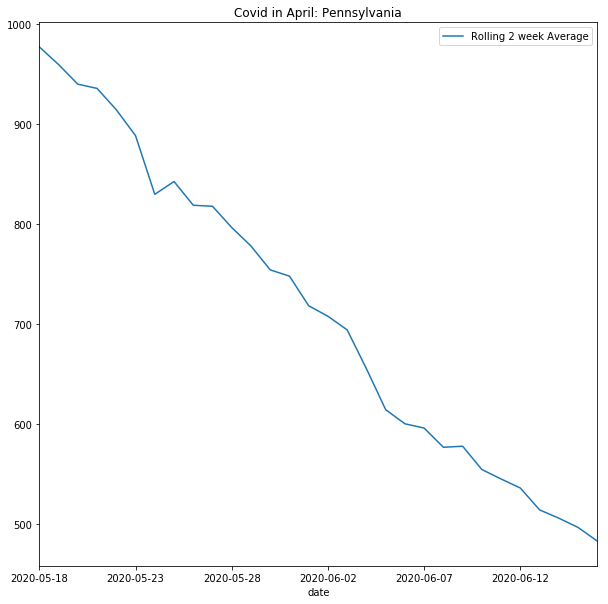

In [22]:
plot_covid_lag('Pennsylvania')

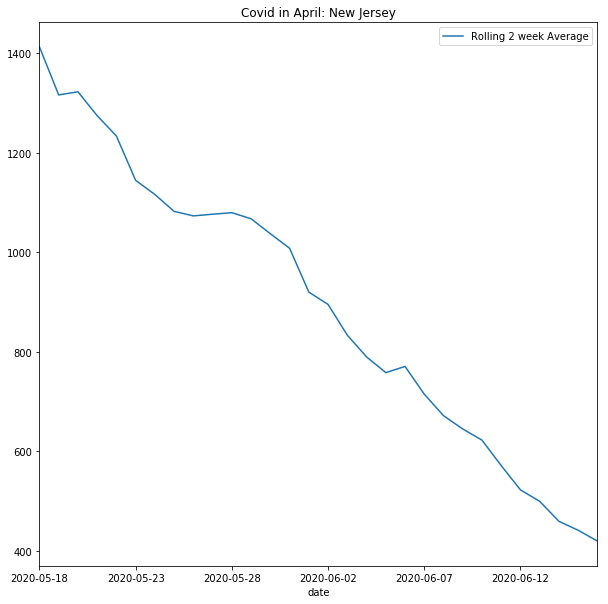

In [23]:
plot_covid_lag('New Jersey')

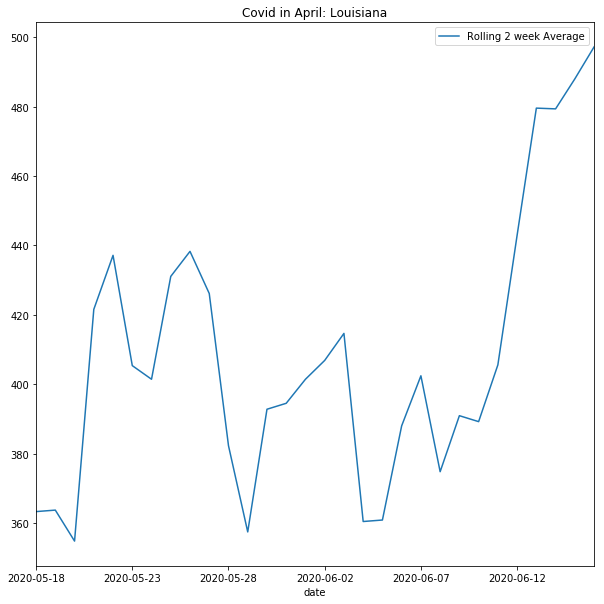

In [24]:
plot_covid_lag('Louisiana')

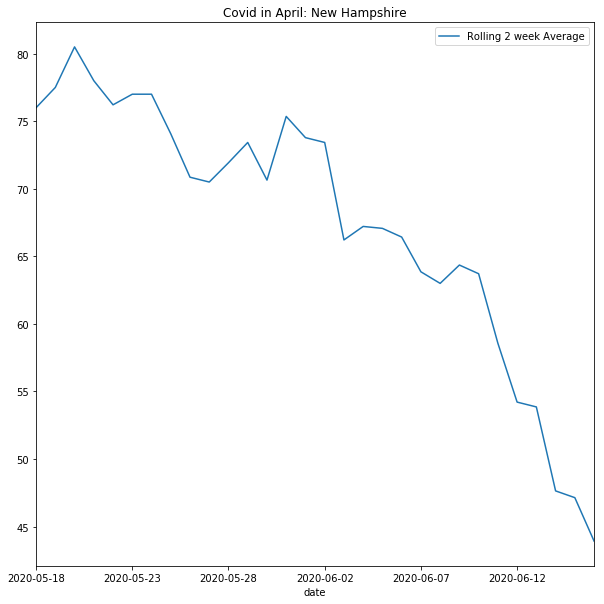

In [25]:
plot_covid_lag('New Hampshire')

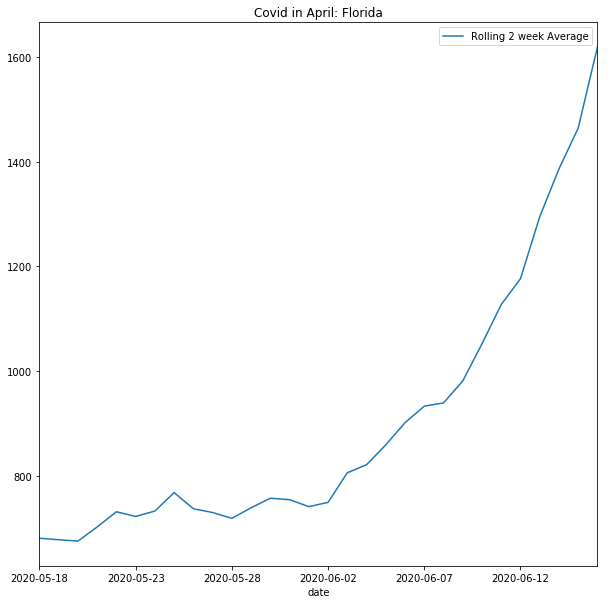

In [26]:
plot_covid_lag('Florida')

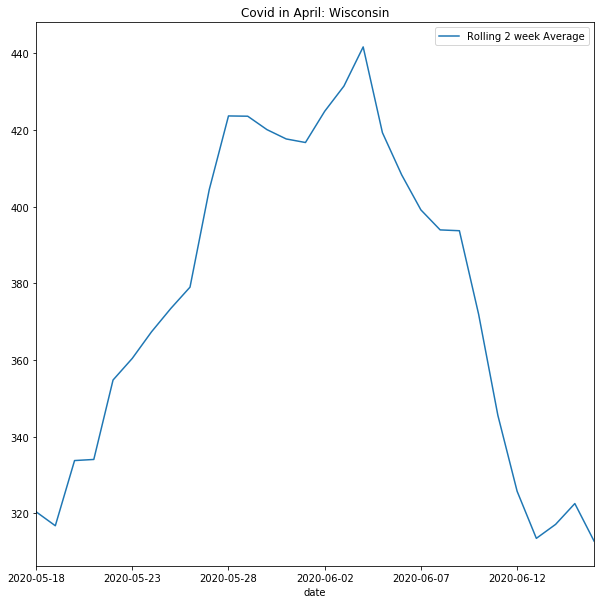

In [27]:
plot_covid_lag('Wisconsin')

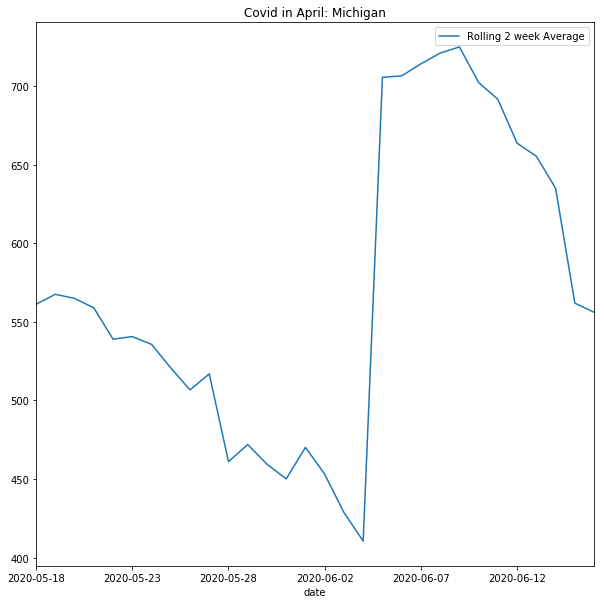

In [28]:
plot_covid_lag('Michigan')

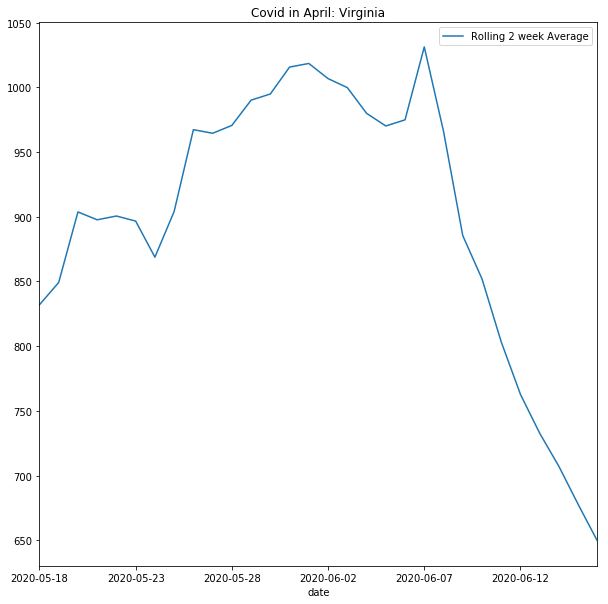

In [29]:
plot_covid_lag('Virginia')

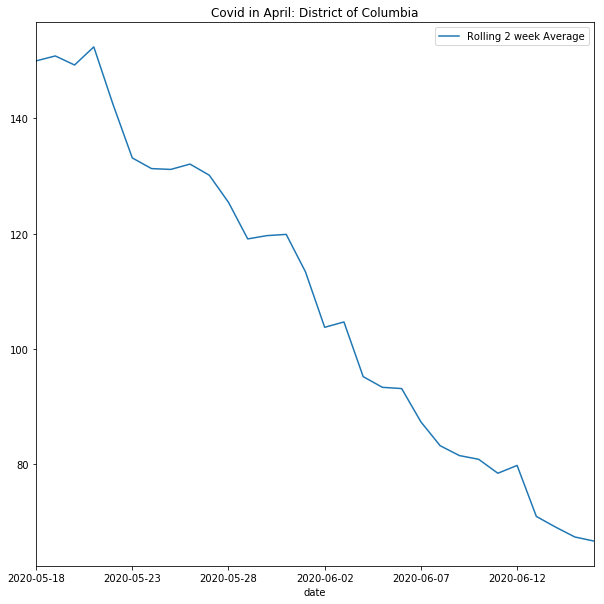

In [30]:
plot_covid_lag('District of Columbia')

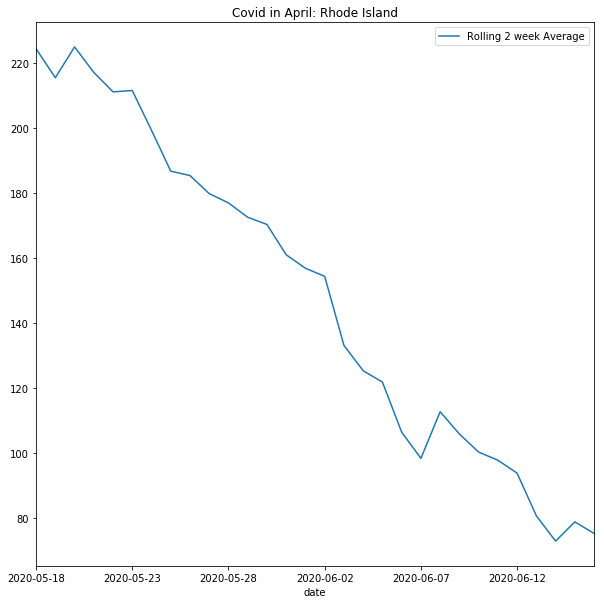

In [31]:
plot_covid_lag('Rhode Island')

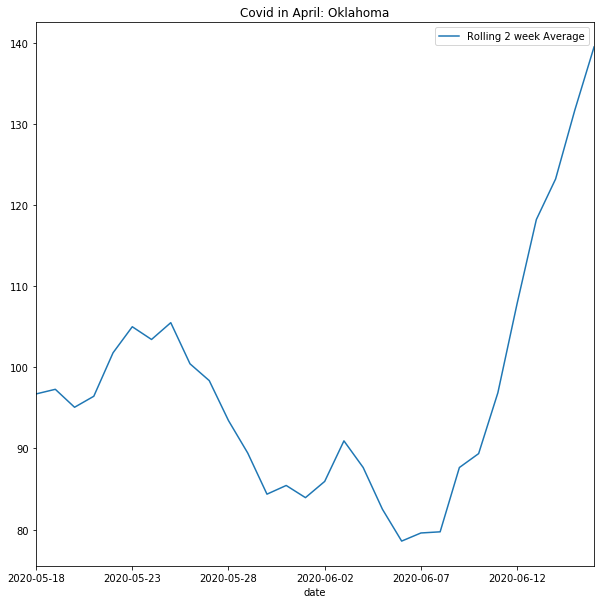

In [32]:
plot_covid_lag('Oklahoma')

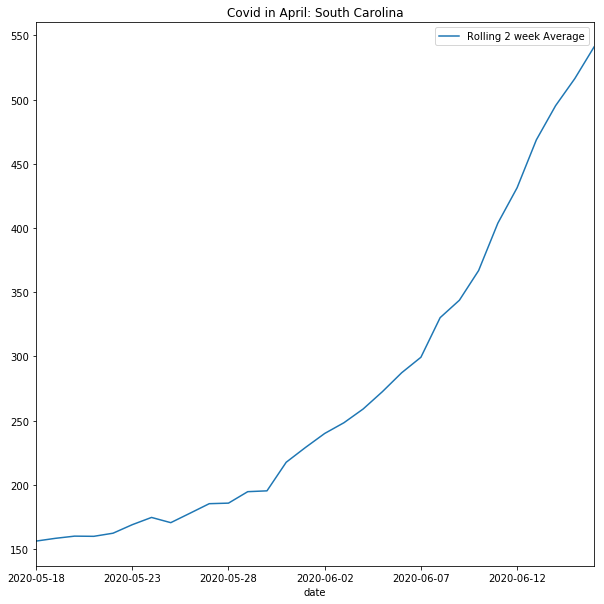

In [33]:
plot_covid_lag('South Carolina')

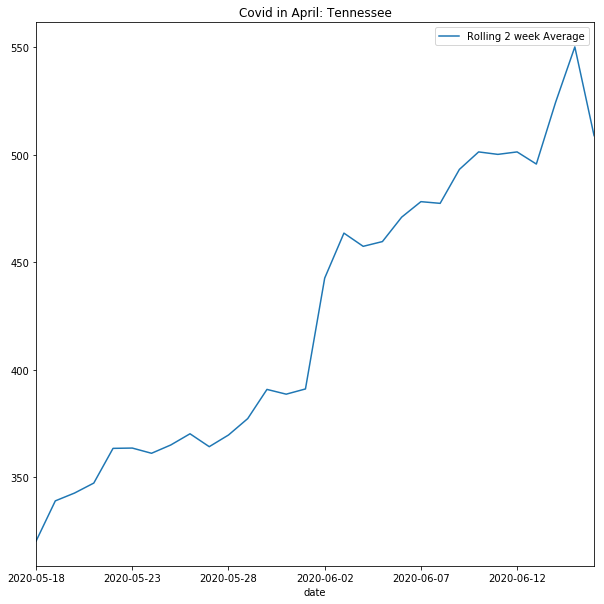

In [34]:
plot_covid_lag('Tennessee')

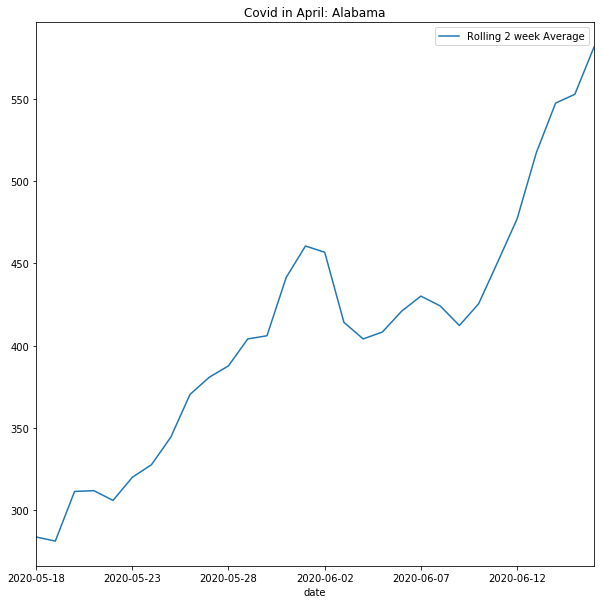

In [35]:
plot_covid_lag("Alabama")

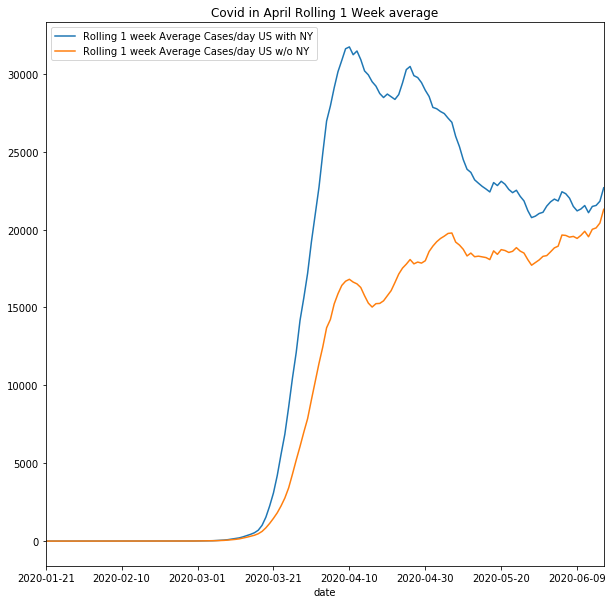

In [36]:
fig,ax = plt.subplots(figsize=(10,10))
(states_df.groupby('date')['cases_last_7'].sum()/7).plot(ax=ax,label="Rolling 1 week Average Cases/day US with NY")
(states_df.loc[~states_df['state'].isin(['New York','New Jersey','Massachusetts'])].groupby('date')['cases_last_7'].sum()/7).plot(ax=ax, label = "Rolling 1 week Average Cases/day US w/o NY")
ax.set_title("Covid in April Rolling 1 Week average")
ax.legend()

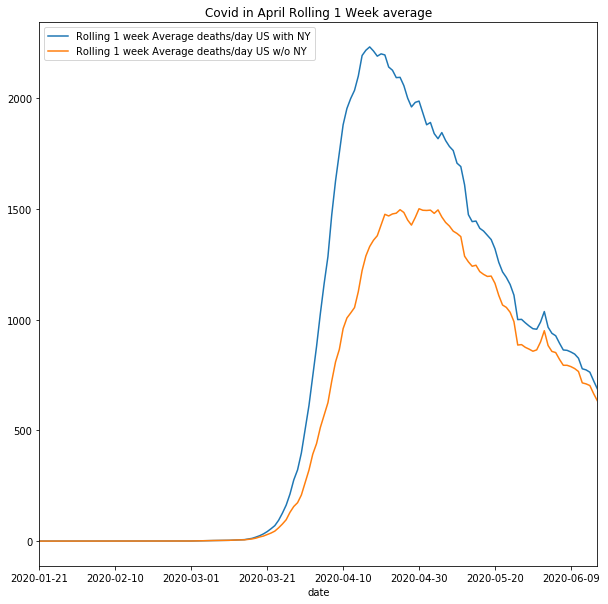

In [37]:
fig,ax = plt.subplots(figsize=(10,10))
(states_df.groupby('date')['deaths_last_7'].sum()/7).plot(ax=ax,label="Rolling 1 week Average deaths/day US with NY")
(states_df.loc[states_df['state']!='New York'].groupby('date')['deaths_last_7'].sum()/7).plot(ax=ax, label = "Rolling 1 week Average deaths/day US w/o NY")
ax.set_title("Covid in April Rolling 1 Week average")
ax.legend()

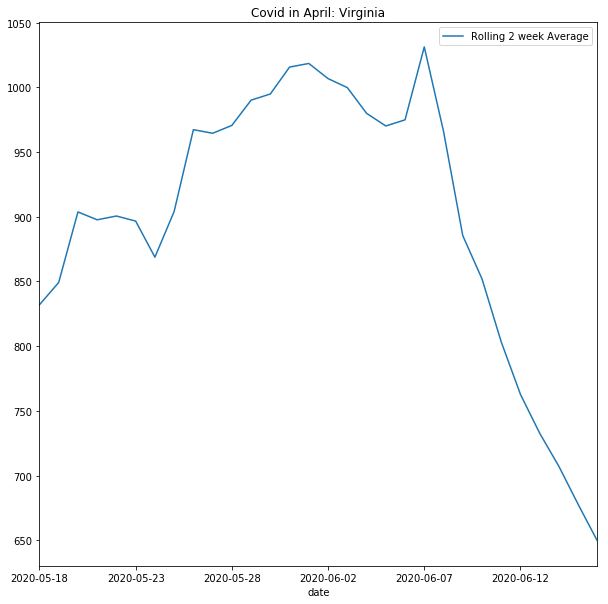

In [38]:
plot_covid_lag('Virginia')

In [39]:
fips_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [40]:
fips_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [41]:
def plot_county(county,state,days=30):
    county_df = fips_df[(fips_df['county']==county) & (fips_df['state']==state)].set_index('date')
    county_df['daily_cases'] = county_df['cases'].diff()
    county_df['rolling_7_days'] = county_df['daily_cases'].rolling(7).mean()
    county_df['rolling_14_days'] = county_df['daily_cases'].rolling(14).mean()
    plot_df = county_df.iloc[-days:]
    fig,ax = plt.subplots(figsize=(10,10))
    plot_df['daily_cases'].plot(ax=ax,label='Daily Cases',alpha=.3)

    plot_df['rolling_7_days'].plot(ax=ax,label='Rolling 1 Week',alpha=0.6)
    plot_df['rolling_14_days'].plot(ax=ax,label='Rolling 2 weeks',linewidth=3)
    ax.set_title("Covid Cases: {} County, {}".format(county,state),fontsize=14)
    ax.set_ylim(0,plot_df['daily_cases'].max()+10)
    ax.legend()

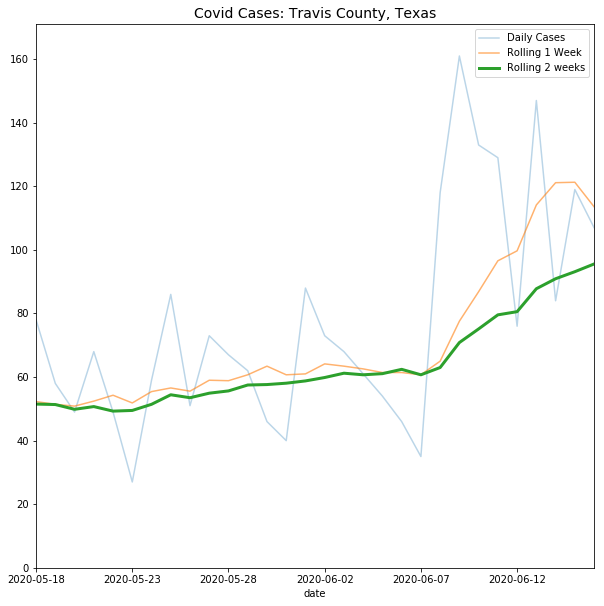

In [42]:
plot_county('Travis','Texas')

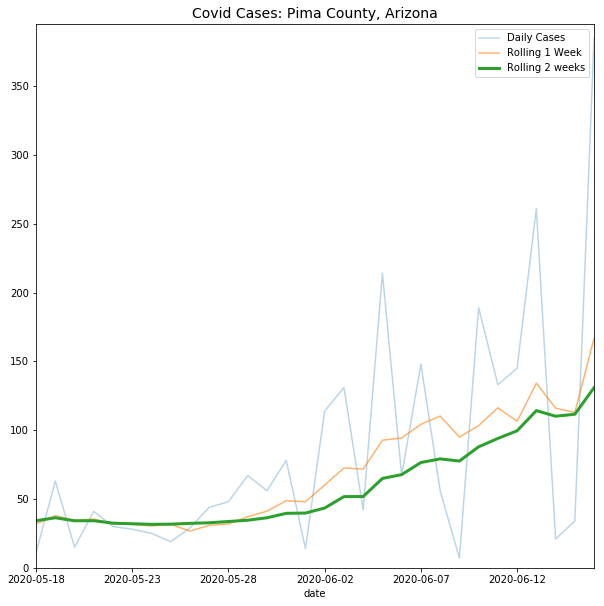

In [43]:
plot_county('Pima','Arizona')

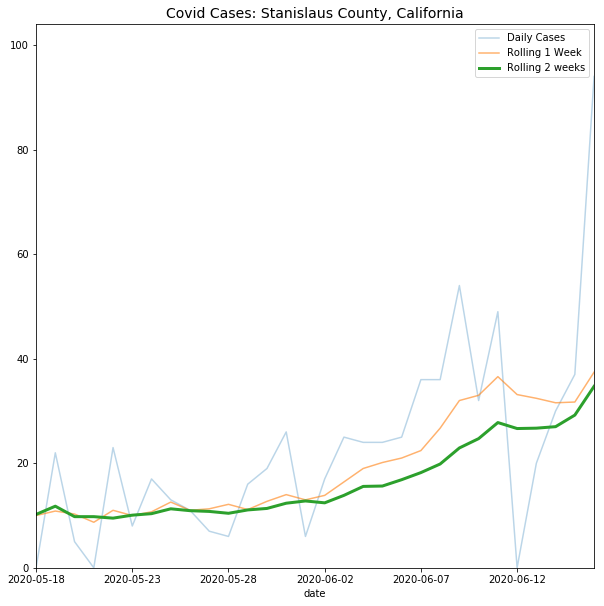

In [44]:
plot_county('Stanislaus','California')

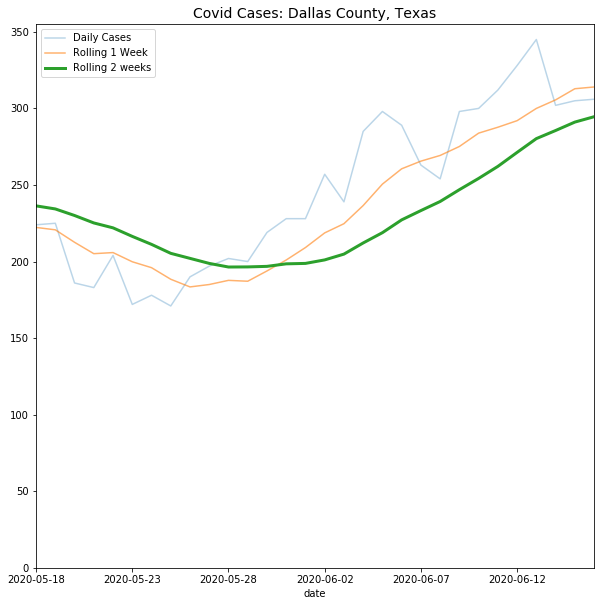

In [45]:
plot_county('Dallas','Texas')

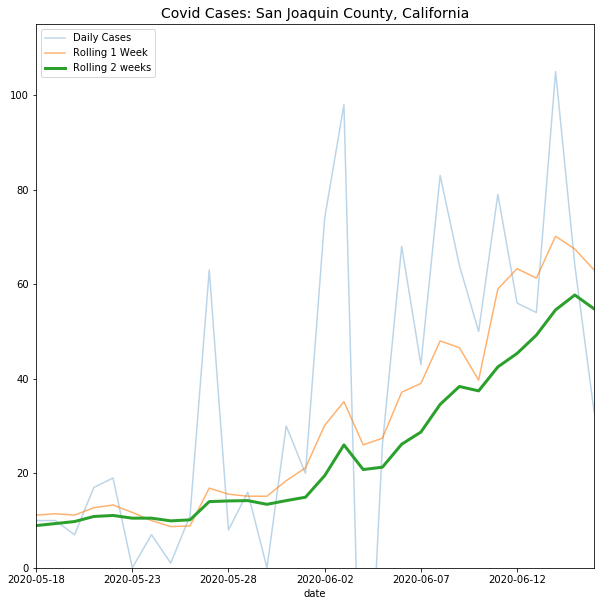

In [46]:
plot_county('San Joaquin','California')

In [47]:
travis_df = fips_df[fips_df['county']=='Travis'].set_index('date')

In [48]:
travis_df['daily_cases'] = travis_df['cases']-travis_df['cases'].shift()

In [49]:
travis_df['rolling_7_days']=travis_df['daily_cases'].rolling(7).mean()

In [50]:
travis_df['Rolling 14 Cases'] = travis_df['daily_cases'].rolling(14).mean()

In [51]:
plot_df = travis_df.iloc[-30:]

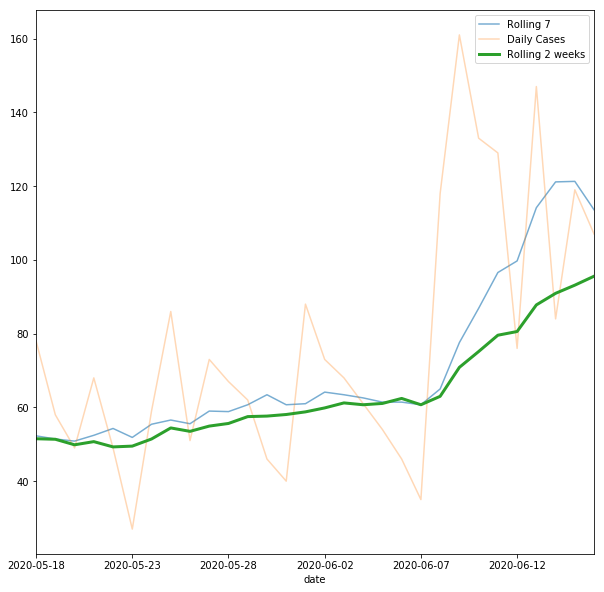

In [52]:
fig,ax = plt.subplots(figsize=(10,10))
plot_df['rolling_7_days'].plot(ax=ax,label='Rolling 7',alpha=0.6)
plot_df['daily_cases'].plot(ax=ax,label='Daily Cases',alpha=.3)
plot_df['Rolling 14 Cases'].plot(ax=ax,label='Rolling 2 weeks',linewidth=3)
ax.legend()

In [53]:
us_df.shape, fips_df.shape, states_df.shape

((148, 5), (242827, 6), (5844, 11))

In [54]:
states_df['cases'].max()

389349

In [55]:
death_df = states_df.dropna(subset=['deaths_last_7'])

In [56]:
death_df['max_deaths_last_7'] = death_df['state'].map(death_df.groupby('state')['deaths_last_7'].max().to_dict())

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
death_df['scaled_deaths_last_7'] = death_df['deaths_last_7']/death_df['max_deaths_last_7']

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
death_df['max_cases_last_7'] = death_df['state'].map(death_df.groupby('state')['cases_last_7'].max().to_dict())

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
death_df['scaled_cases_last_7'] = death_df['cases_last_7']/death_df['max_cases_last_7']

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


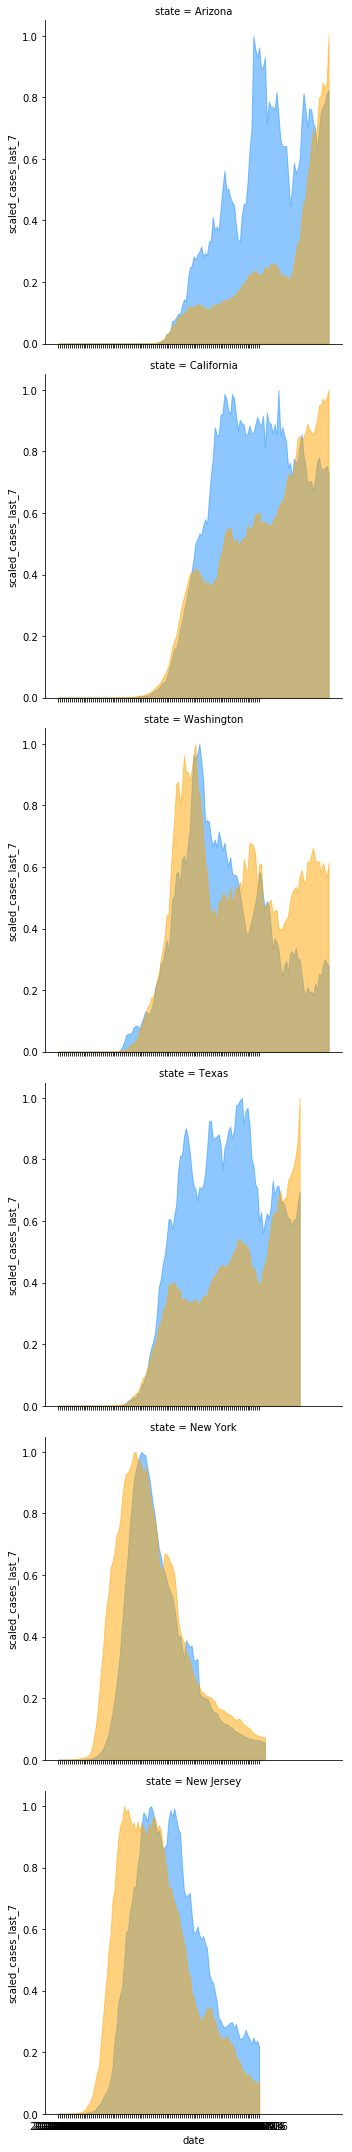

In [60]:
import seaborn as sns
g = sns.FacetGrid(death_df[death_df['state'].isin(['Arizona','Texas','California','Washington','New Jersey','New York'])].reset_index(drop=True),row='state',height=5)
g.map(plt.stackplot,'date','scaled_deaths_last_7',alpha=0.5,color='dodgerblue')
g.map(plt.stackplot,'date','scaled_cases_last_7',alpha=0.5,color='orange')

In [63]:
death_df.head()

,date,state,fips,cases,deaths,daily_new_cases,daily_new_deaths,deaths_last_7,cases_last_7,cases_last_14,deaths_last_14,max_deaths_last_7,scaled_deaths_last_7,max_cases_last_7,scaled_cases_last_7
16,2020-01-28,Arizona,4,1,0,0.0,0.0,0.0,1.0,NaN,NaN,187.0,0.0,10902.0,0.000092
17,2020-01-28,California,6,2,0,0.0,0.0,0.0,2.0,NaN,NaN,585.0,0.0,21868.0,0.000091
18,2020-01-28,Illinois,17,1,0,0.0,0.0,0.0,1.0,NaN,NaN,838.0,0.0,17957.0,0.000056
19,2020-01-28,Washington,53,1,0,0.0,0.0,0.0,0.0,NaN,NaN,190.0,0.0,3509.0,0.000000
20,2020-01-29,Arizona,4,1,0,0.0,0.0,0.0,1.0,NaN,NaN,187.0,0.0,10902.0,0.000092


In [64]:
death_df['deaths_last_14_scaled'] = death_df['deaths_last_14']/death_df['state'].map(death_df.groupby('state')['deaths_last_14'].max())
death_df['cases_last_14_scaled'] = death_df['cases_last_14']/death_df['state'].map(death_df.groupby('state')['cases_last_14'].max())

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
death_df.reset_index(drop=True,inplace=True)

In [67]:
death_df.head()

,date,state,fips,cases,deaths,daily_new_cases,daily_new_deaths,deaths_last_7,cases_last_7,cases_last_14,deaths_last_14,max_deaths_last_7,scaled_deaths_last_7,max_cases_last_7,scaled_cases_last_7,deaths_last_14_scaled,cases_last_14_scaled
0,2020-01-28,Arizona,4,1,0,0.0,0.0,0.0,1.0,NaN,NaN,187.0,0.0,10902.0,0.000092,NaN,NaN
1,2020-01-28,California,6,2,0,0.0,0.0,0.0,2.0,NaN,NaN,585.0,0.0,21868.0,0.000091,NaN,NaN
2,2020-01-28,Illinois,17,1,0,0.0,0.0,0.0,1.0,NaN,NaN,838.0,0.0,17957.0,0.000056,NaN,NaN
3,2020-01-28,Washington,53,1,0,0.0,0.0,0.0,0.0,NaN,NaN,190.0,0.0,3509.0,0.000000,NaN,NaN
4,2020-01-29,Arizona,4,1,0,0.0,0.0,0.0,1.0,NaN,NaN,187.0,0.0,10902.0,0.000092,NaN,NaN


In [130]:
death_df['date'] = pd.to_datetime(death_df['date'])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


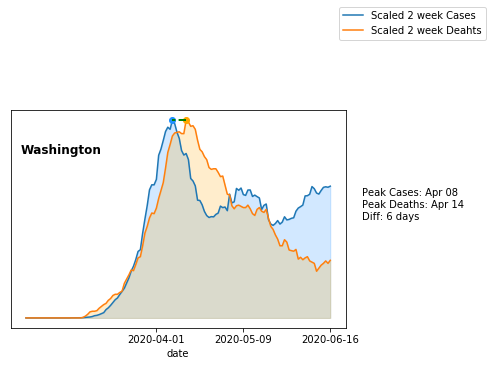

In [266]:
import datetime
from matplotlib import dates
from matplotlib.ticker import FuncFormatter
def plot_deaths_vs_cases(date,cases,deaths,title,ax=False,add_lines=True,legend=True):
    if not ax:
        ax = sns.lineplot(date,cases,label='Scaled 2 week Cases')
    else:
        sns.lineplot(date,cases,ax=ax,label='Scaled 2 week Cases')
    ax.fill_between(date,0,cases,color='dodgerblue',alpha=0.2)
    sns.lineplot(date,deaths,ax=ax,label='Scaled 2 week Deahts')
    ax.fill_between(date,0,deaths,color='orange',alpha=0.2)

    peak_case_date = date[cases.idxmax()]
    peak_death_date = date[deaths.idxmax()]
    days = (peak_death_date-peak_case_date).days
    ax.plot(peak_death_date,deaths.max(),'o',color='orange')
    ax.plot(peak_case_date,cases.max(),'o',color='dodgerblue')
    if add_lines:
        if days <0:
            color='red'
        else:
            color='green'
        y = [deaths.max(),cases.max()]
        x = [peak_death_date, peak_case_date]
        ax.plot(x,y,color=color,linewidth=2,linestyle='--')
    ax.axes.get_yaxis().set_visible(False)
    date_set = datetime.datetime(year=2020,month=4,day=1)
    date_set2 = (date.max()-date_set)/2+date_set
    date_ticks = [date_set,date_set2,date.max()]
    ax.set_xticks([dates.date2num(x) for x in date_ticks])
    ax.set_xticklabels([x.strftime('%Y-%m-%d') for x in date_ticks])
    ax.text(1.05,0.5,"Peak Cases: {}\nPeak Deaths: {}\nDiff: {} days"
            .format(peak_case_date.strftime('%b %d'),peak_death_date.strftime('%b %d'),days),transform=ax.transAxes)
    if legend:
        ax.legend(loc='upper center',bbox_to_anchor=(1.2,1.5))
    else:
        ax.legend().set_visible(False)
    ax.text(.03,.8,title,fontsize=12,fontweight='bold',transform=ax.transAxes)

arizona_df = death_df[death_df['state']=='Washington']
plot_deaths_vs_cases(arizona_df['date'],arizona_df['cases_last_14_scaled'],arizona_df['deaths_last_14_scaled'],title='Washington')

In [246]:
death_df['state']

0             Arizona
1          California
2            Illinois
3          Washington
4             Arizona
            ...      
5823         Virginia
5824       Washington
5825    West Virginia
5826        Wisconsin
5827          Wyoming
Name: state, Length: 5828, dtype: object

In [ ]:
import make_plots as m
import datetime
from matplotlib import dates
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as pd
%matplotlib inline


exclude_states = ['Puerto Rico', 'Virgin Islands',
   'Guam', 'Northern Mariana Islands']
death_df = m.prep_data()
fig,axes = m.plot_deaths_state_grid(death_df[~death_df['state'].isin(exclude_states)].reset_index(drop=True),add_lines=False,figsize=(5,50))
axes[0].set_title("Covid 19 Peaks by State",fontsize=14,fontweight='bold')
fig.tight_layout()
fig.savefig('test.png')

Montana


KeyboardInterrupt: 

In [5]:
len(axes)

51

In [108]:
death_df['date'] = death_df['date'].astype(str)
death_df.reset_index(drop=True,inplace=True)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
# dates.datestr2num(death_df['date'])
death_df['date_num'] = dates.datestr2num(death_df['date'])


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5828 entries, 0 to 5827
Data columns (total 18 columns):
date                     5828 non-null object
state                    5828 non-null object
fips                     5828 non-null int64
cases                    5828 non-null int64
deaths                   5828 non-null int64
daily_new_cases          5828 non-null float64
daily_new_deaths         5828 non-null float64
deaths_last_7            5828 non-null float64
cases_last_7             5828 non-null float64
cases_last_14            5797 non-null float64
deaths_last_14           5797 non-null float64
max_deaths_last_7        5828 non-null float64
scaled_deaths_last_7     5828 non-null float64
max_cases_last_7         5828 non-null float64
scaled_cases_last_7      5828 non-null float64
deaths_last_14_scaled    5797 non-null float64
cases_last_14_scaled     5797 non-null float64
date_num                 5828 non-null float64
dtypes: float64(13), int64(3), object(2)
memory usage: 

<class 'str'>


ValueError: invalid literal for int() with base 10: 'date_num'

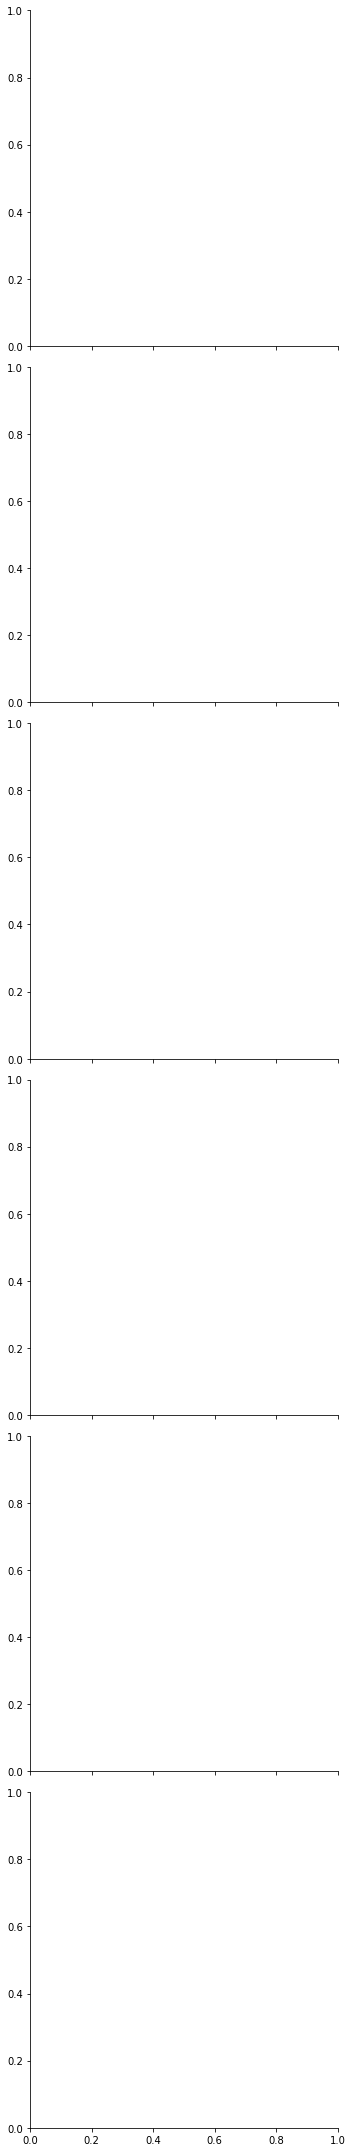

In [129]:
g = sns.FacetGrid(death_df[death_df['state'].isin(['Arizona','Texas','California','Washington','New Jersey','New York'])].reset_index(drop=True),row='state',height=5)
g.map(plot_deaths_vs_cases,date='date_num',cases='cases_last_14_scaled',deaths='deaths_last_14_scaled')
